In [202]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5_roc.ipynb")

---

<h1><center>SDSE Homework 5 <br><br> Probability thresholds and the ROC curve </center></h1>

---

In this part we will plot the ROC curve for a logistic regression classifier. We will also select probability thresholds for maximizing accuracy and minimizing cost. The problem is based on the "Iris dataset", which is provided with scikit-learn. You don't need to know anything about the dataset, but if you are curious you can find more information [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
rng_seed = 23987
cmap = ListedColormap(['red', 'green'])
%matplotlib notebook

# Load the data

Begin by importing the data using `load_iris`. This returns a dictionary with several useful entries, including the feature and target data. The full dataset has 150 samples, with 4 features, and 3 classes of iris flower (the target). We will work with only two features (columns 1 and 2) and two classes (0 and 1). The code below removes the unwanted rows and columns from X and y. How many samples are left after filtering?

In [204]:
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer

iris = datasets.load_iris()

keeprows = [target in [1,2] for target in iris.target]
X = iris.data[keeprows,:]
y = LabelBinarizer().fit_transform(iris.target[keeprows])
y = y[:,0]
X = X[:,:2]
print('number of samples =', len(y))


number of samples = 100


# 1. Split the data into training and testing

Use `train_test_split` to split `X` and `y` into training and testing datasets. 20% of the data should be kept for testing. The `random_state` parameter of the splitter should be set to `rng_seed`, for autograding (and debugging) purposes.

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng_seed)


In [206]:
grader.check("q1")

q1 results: All test cases passed!

# 2. Build a logistic regression pipeline

Create a pipeline model with a standard scaler and a logistic regression classifier. Again, set the random state of the classifier to `rng_seed`. Then, train the model parameters. 

In [207]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('scaler',StandardScaler()),
    ('logreg',LogisticRegression())
])

model = model.fit(X_train, y_train)

# 3. Extract theta0 and theta from the trained logistic regression model

Extract the logistic regression coefficients -- theta0 and theta from the model. Remember that the logistic regression object is accessed with `model.named_steps['logreg']`. `theta0` should be a scalar, and theta should be an array of shape `(2,)`

In [208]:
theta0 = -0.21835993602952442
theta = model.named_steps['logreg'].coef_[0]
print(theta)

[1.21227425 0.18166092]


In [209]:
grader.check("q3")

q3 results: All test cases passed!

The plot below shows the test data along with the linear decision boundary and its gradient (theta). 

<IPython.core.display.Javascript object>


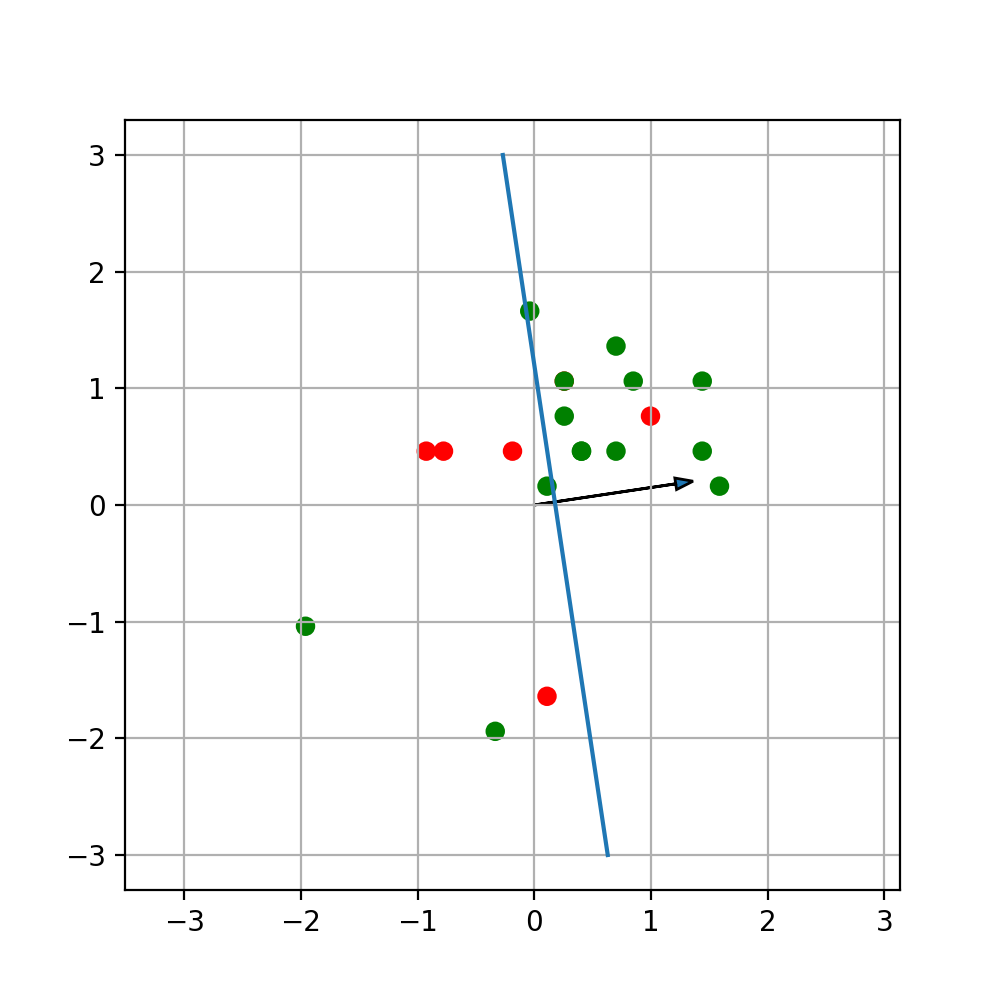

In [210]:
Xtest_scaled = model.named_steps['scaler'].transform(X_test)

x2 = np.linspace(-3,3)
x1 = -(theta0 + theta[1]*x2)/theta[0]

plt.figure(figsize=(5,5))
plt.scatter(Xtest_scaled[:,0],Xtest_scaled[:,1],c=y_test,cmap=cmap)
plt.plot(x1,x2)
plt.arrow(0,0,theta[0],theta[1],head_width=.1)
plt.axis('equal')
plt.grid()

# 4. Compute the test accuracy

Use the model to make predictions for the test data, and store those predictions in `yhat`. Then use scikit-learn's `accuracy_score` method to estimate the accuracy of the model. 

In [211]:
from sklearn.metrics import accuracy_score

yhat = model.predict(X_test)
test_acc = accuracy_score(y_test, yhat)


In [212]:
grader.check("q4")

q4 results: All test cases passed!

# 5. Compute the prediction probabilities

Use the model's `predict_proba` method to estimate class probabilities for the test data points. Notice that the probabilities for class 0 and class 1 add up to one for each test data point. Store the p(Y=1|X=x) in yhat_proba.

In [213]:
yhat_proba = model.predict_proba(X_test)
yhat_proba = yhat_proba[:,1]
print(yhat_proba[:3])


[0.70645249 0.6714233  0.40515411]


In [214]:
grader.check("q5")

q5 results: All test cases passed!

The plot below shows these probabilities in a 3D projection. You can rotate the figure with your mouse to get a sense of their relation to the decision boundary. Notice how the probabilties follow a sigmoid shape. 

<IPython.core.display.Javascript object>


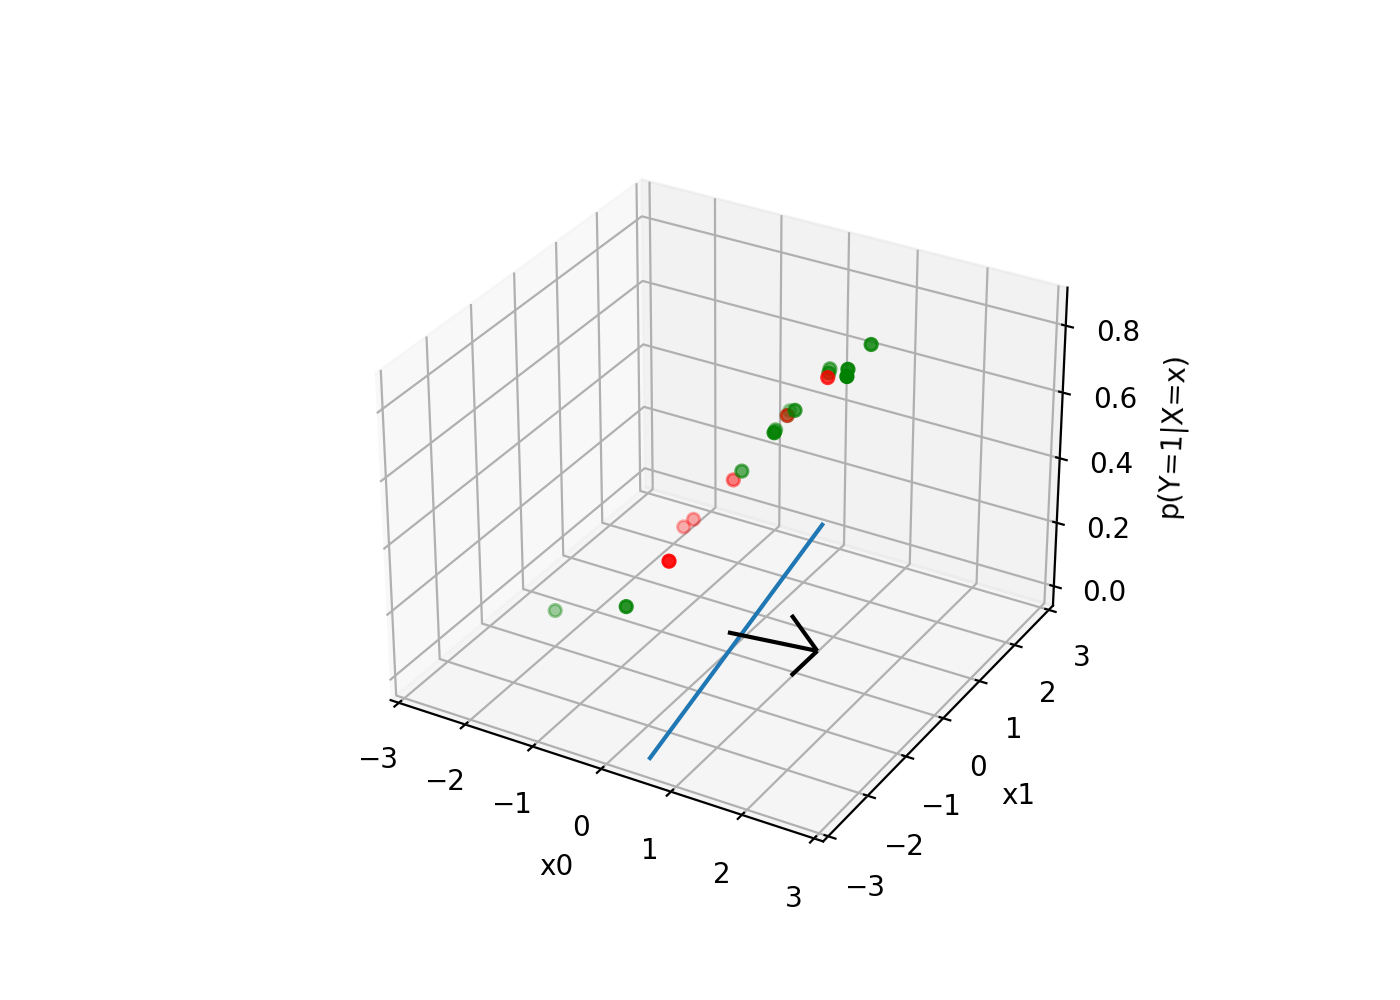

Text(0.5, 0, 'p(Y=1|X=x)')

In [215]:
plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')
ax.scatter3D(Xtest_scaled[:,0],Xtest_scaled[:,1],yhat_proba,c=y_test,cmap=cmap)
ax.plot(x1,x2,0*x1)
ax.quiver(0,0,0, theta[0],theta[1],0, color='black')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('p(Y=1|X=x)')

# 6. Use scikit-learn to plot the ROC curve

See the documentation on [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) for the input and output parameters

<IPython.core.display.Javascript object>


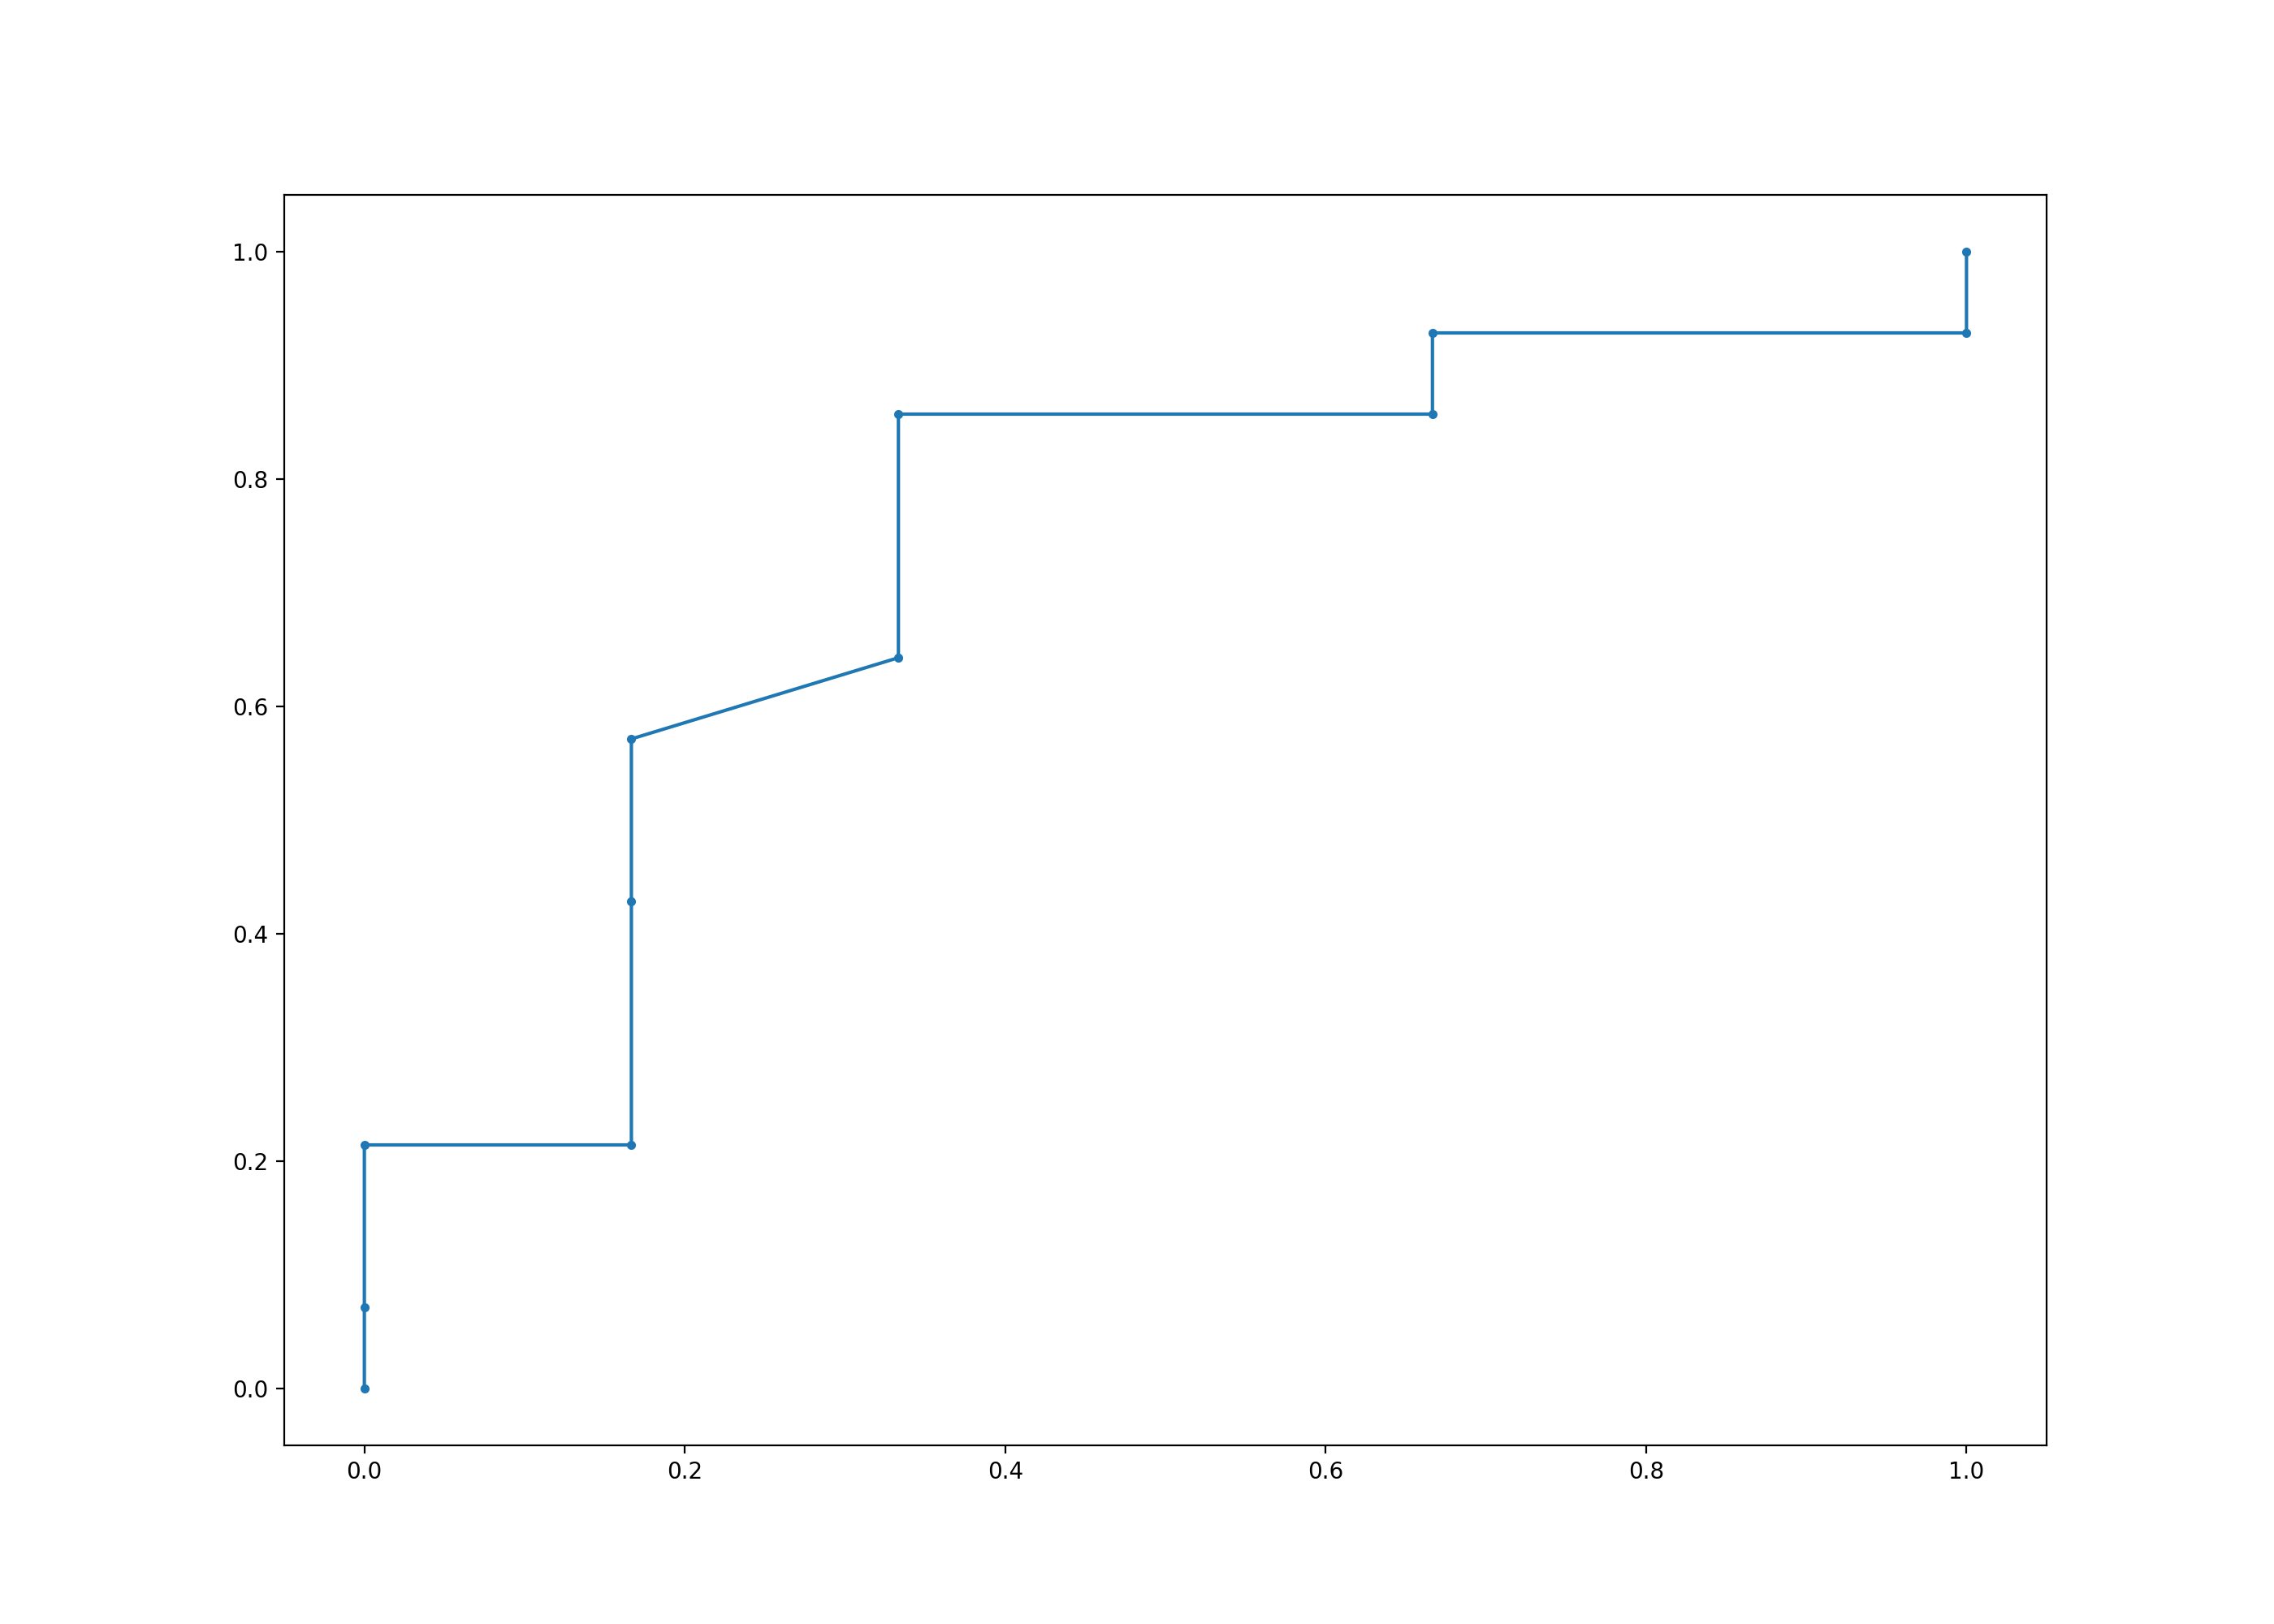

[1.85011999 0.85011999 0.83352675 0.75540295 0.6714233  0.58810785
 0.57100837 0.48578862 0.40515411 0.27362957 0.22148831 0.05817622]


In [216]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,yhat_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr,'.-') 
print(thresholds)

In [217]:
grader.check("q6")

q6 results: All test cases passed!

# 7. Compute performance metrics

`N`, `Nn`, and `Np` are the number of test samples, the number of negative test samples, and the number of positive test samples. 

In [218]:
N = len(y_test)
Nn = sum(y_test==0)
Np = sum(y_test==1)

Allocate arrays arrays of length `N` for the true positive rate `TPR`, 
true negative rate `TNR`, the accuracy `A`, and the cost `Cost`. 

In [219]:
TPR = np.empty((N))
TNR = np.empty((N))
FPR = np.empty((N))
A = np.empty((N))
Cost = np.empty((N))

`Cost` will be computed assuming that a false positive is 5 times more costly than a false negative, and that there is zero profit associated with true positives and true negatives. 

In [220]:
alphaFP = 5
alphaFN = 1

The next cell sorts the probbility scores of the test samples from lowest to highest. That is, from least to most likely to belong to class 1. 

In [221]:
Rho = yhat_proba.copy()
Rho.sort()
Rho

array([0.05817622, 0.22148831, 0.25392753, 0.27362957, 0.40515411,
       0.41076289, 0.48578862, 0.50913494, 0.55760248, 0.57100837,
       0.57100837, 0.58810785, 0.58810785, 0.6714233 , 0.70645249,
       0.73163383, 0.75540295, 0.83352675, 0.84811455, 0.85011999])

For each probability threshold rho in Rho, compute the performance metrics (`TPR`, `TNR`, `A`, and `Cost`) with the decision boundary threshold set at rho. 

Use the formula:

<div>
<img src="formula.png" width="250"/>
</div>

In [222]:
for i, rho in enumerate(Rho):
    
    # compute the positive and negative predictions using rho as the threshold
    # Hint: You don't need to use the model for this. Only yhat_proba. 
    ypred = np.empty(N)
    for k in range(N):
        if yhat_proba[k] >= rho:
            ypred[k] = 1
        else:
            ypred[k] = 0

    # Confusion matrix
    TP = sum( (ypred==1) & (y_test==1) )
    FP = sum( (ypred==1) & (y_test==0) )
    TN = sum( (ypred==0) & (y_test==0) )
    FN = sum( (ypred==0) & (y_test==1) )

#     # Performance metrics
    TPR[i] = TP/(TP+FN)
    TNR[i] = TN/(TN+FP)
    FPR[i] = FP/(FP+TN)
    A[i] = (TP+TN)/N
    Cost[i] = FP*alphaFP + FN*alphaFN

In [223]:
grader.check("q7")

q7 results: All test cases passed!

# 8. Best threshold for accuracy

Report the optimal accuracy and its corresponding probability threshold value.

In [179]:
rhoA = Rho[np.argmax(A)]
Abest = np.max(A)


In [180]:
grader.check("q8")

q8 results: All test cases passed!

# 9. Plot

Plot the accuracy vs threshold curve and indicate the optimal point with a marker. 

<IPython.core.display.Javascript object>


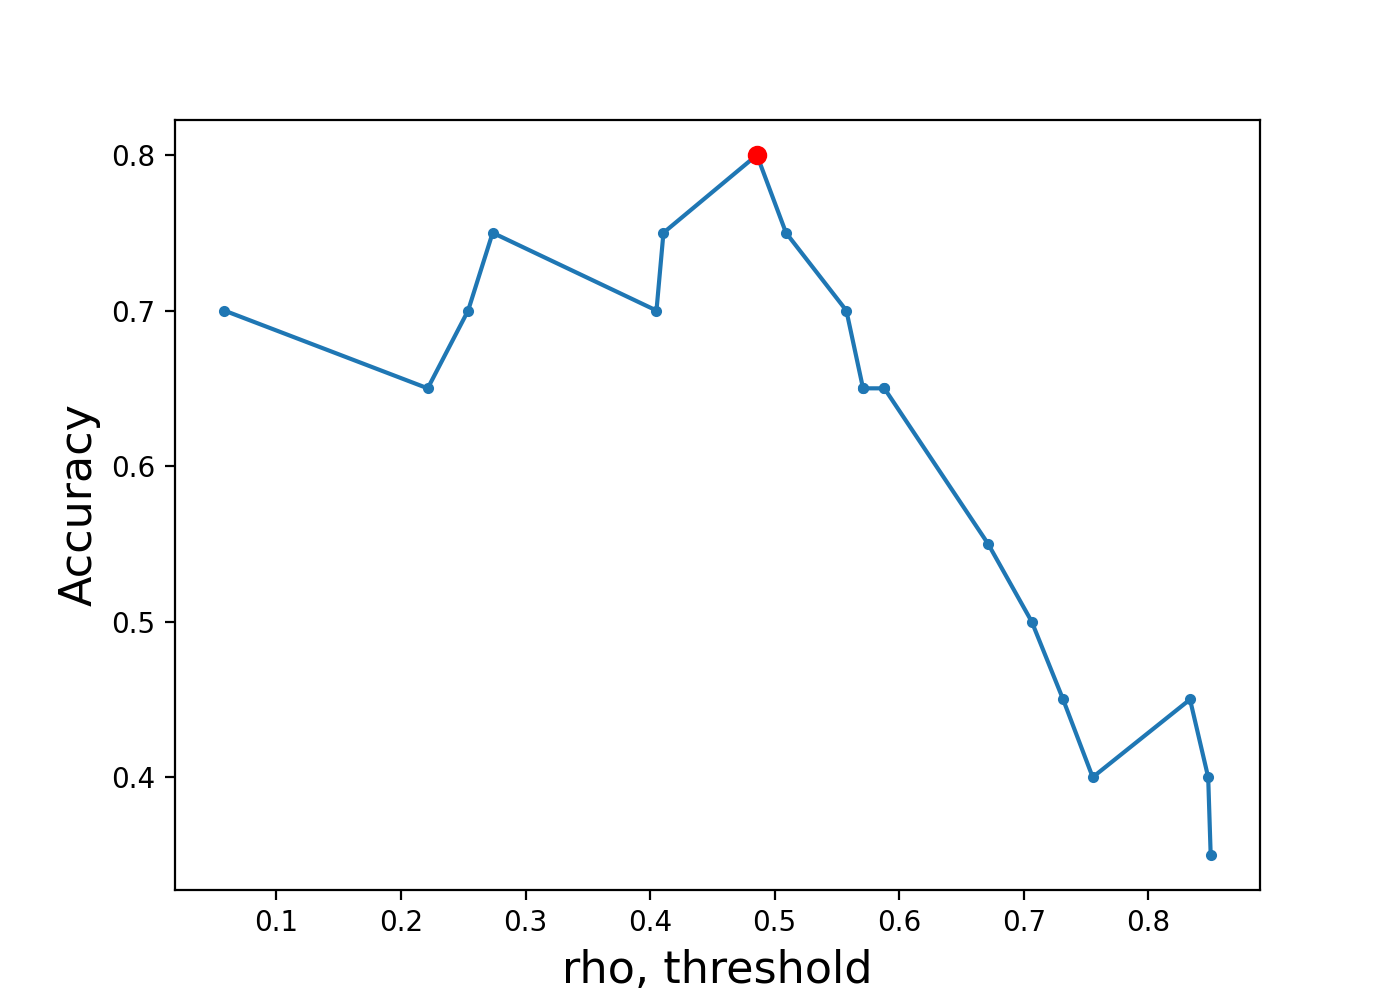

In [181]:
plt.figure(figsize=(7,5))
plt.plot(Rho, A,'.-')
plt.xlabel('rho, threshold',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(rhoA,Abest,'ro') #, label = 'Optimal point')

# 10. Best threshold for cost

Report the optimal cost and its corresponding probability threshold value.

In [189]:
rhoC = Rho[np.argmin(Cost)]
Cbest = np.min(Cost)


In [190]:
grader.check("q10")

q10 results: All test cases passed!

# 11. Plot

Plot the cost vs threshold curve and indicate the optimal point with a marker. 

<IPython.core.display.Javascript object>


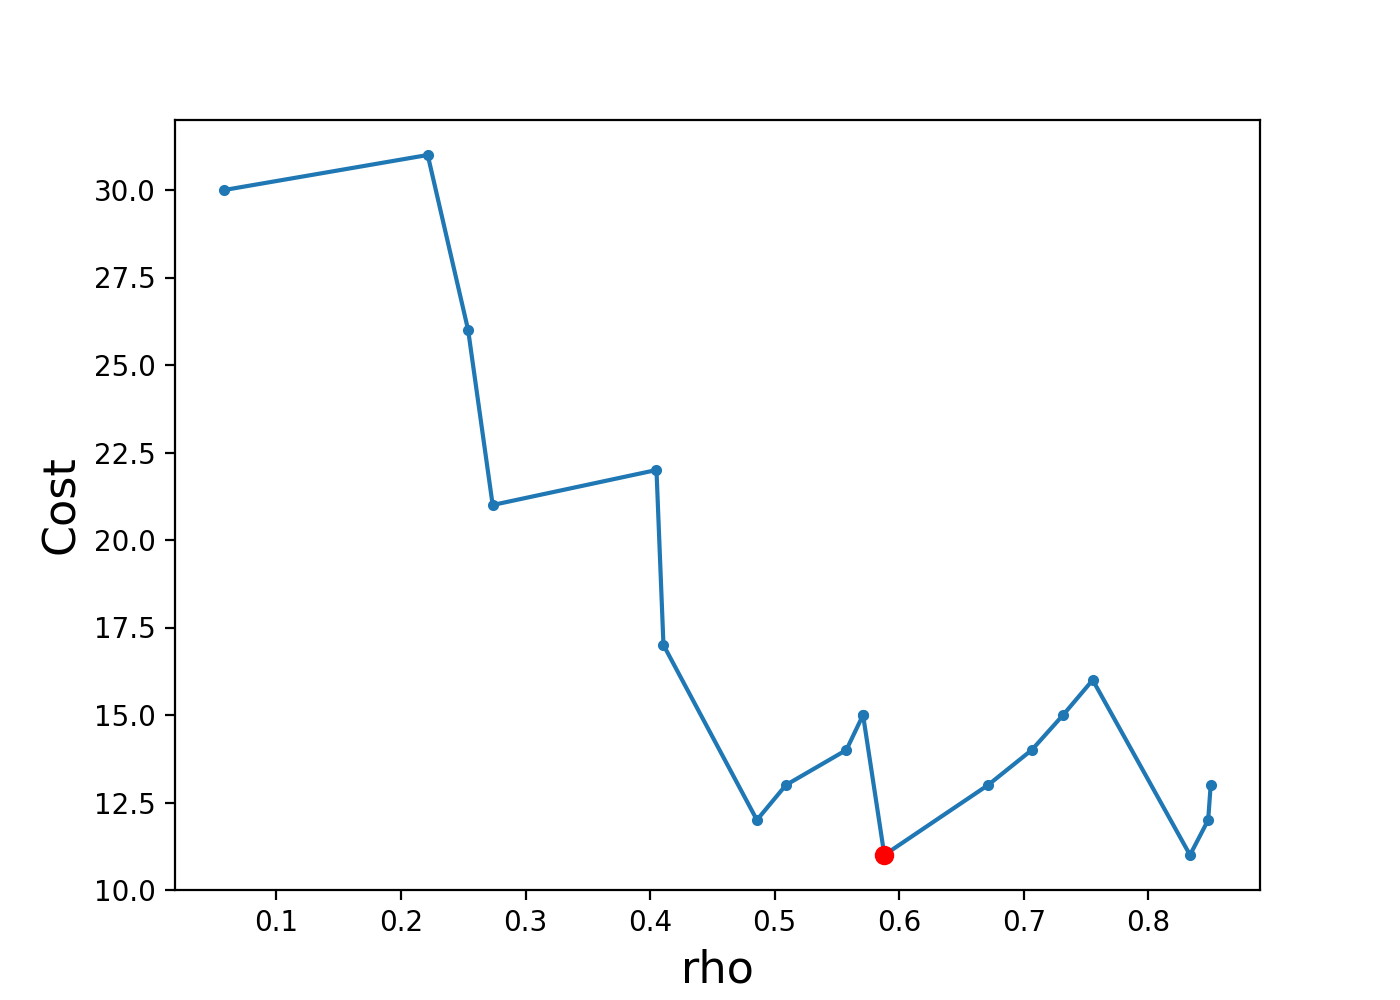

In [191]:
plt.figure(figsize=(7,5))
...
plt.xlabel('rho',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.plot(Rho, Cost,'.-')
plt.plot(rhoC,Cbest,'ro') #, label = 'Optimal point')

# 12. ROC curve

Plot the true positive rate vs the false positive rate. Use the same markers to indicate the optimal accuracy and optimal cost solutions. 

<IPython.core.display.Javascript object>


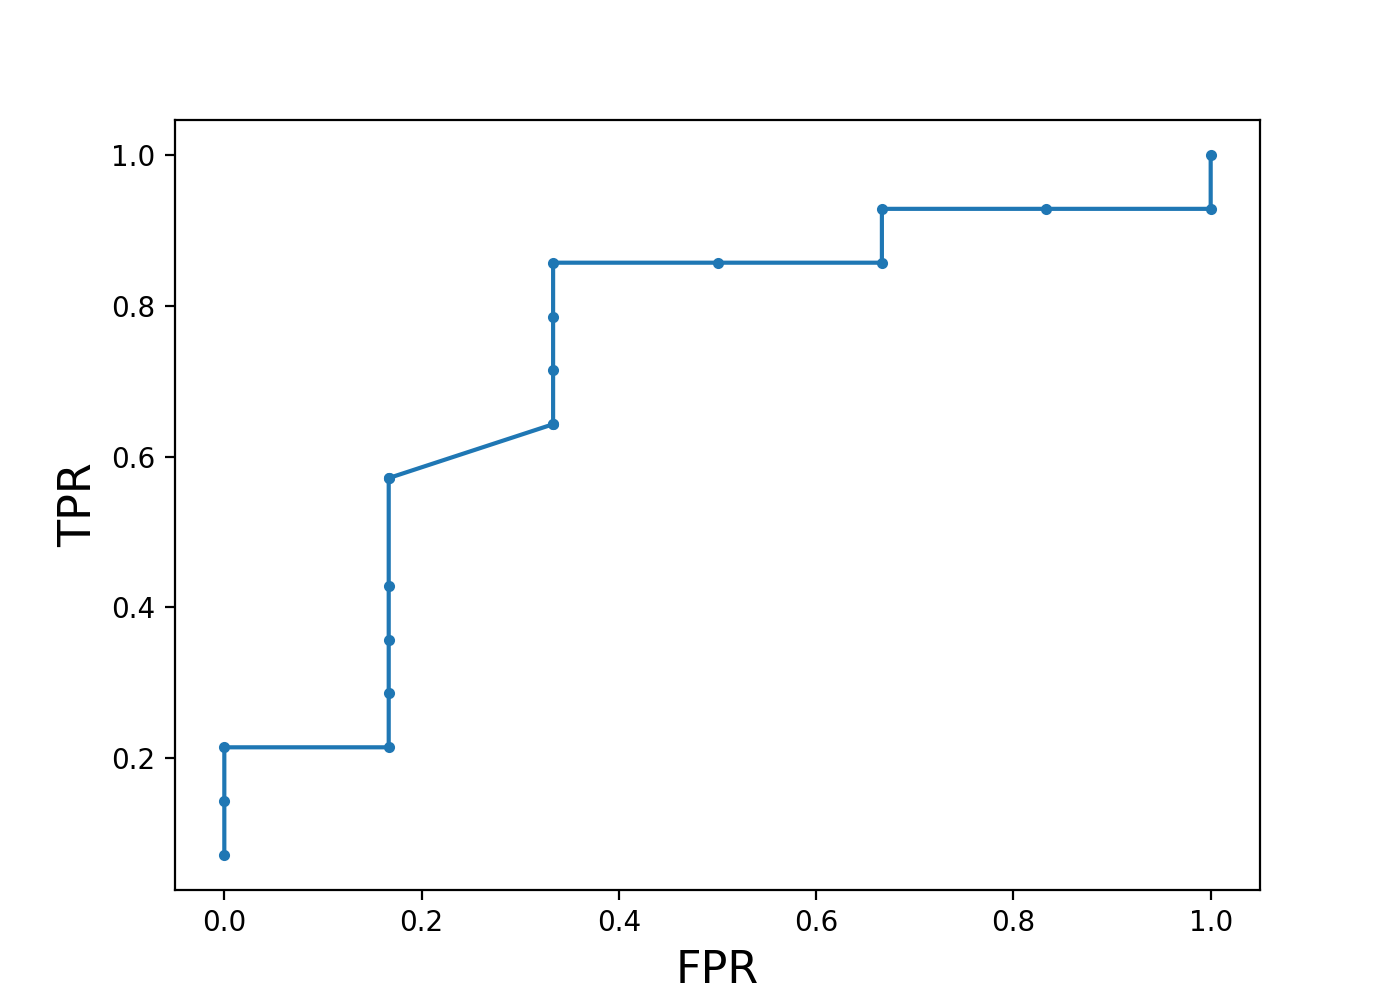

Text(0, 0.5, 'TPR')

In [200]:
plt.figure(figsize=(7,5))
plt.plot(FPR, TPR,'.-')
plt.xlabel('FPR',fontsize=16)
plt.ylabel('TPR',fontsize=16)


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [201]:
# Save your notebook first, then run this cell to export your submission.
grader.export()

OSError: xelatex not found on PATH, if you have not installed xelatex you may need to do so. Find further instructions at https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.